[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Emails found: []
Dates found: []
Numbers found: ['90', '000', '8', '360', '2016', '1948']
Top 15 tokens: [('house', 16), ('white', 14), ('trump', 11), ('construction', 6), ('also', 6), ('ballroom', 5), ('project', 5), ('renovation', 5), ('u', 4), ('said', 4), ('official', 4), ('president', 3), ('new', 3), ('critic', 3), ('national', 3)]
Number + following-word pairs: [('2016', '.'), ('1948', ',')]


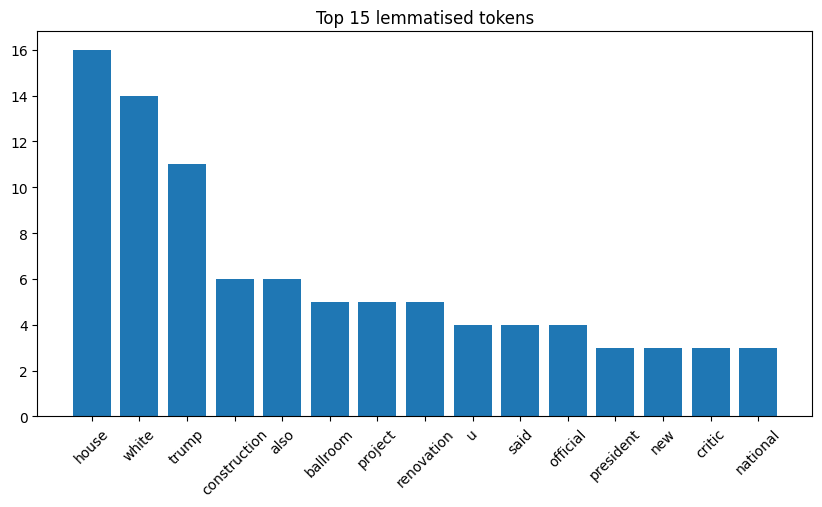

In [2]:
# So in our first first step let's import libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

#And also I need to download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# So here's text which I chose for this homework. I chose it because this article is related to my study programme and I find it intresting and in some way a little bit funny
text = """(US President Donald Trump has defended his decision to demolish part of the White House East Wing to build a ballroom, calling the construction "music to my ears", despite mounting criticism of the project.
Speaking to senators from his Republican Party at the White House on Tuesday, Trump also said: "You probably hear the beautiful sound of construction in the back... When I hear that sound, it reminds me of money."
Trump, a former property developer, is spending $250m (£186m) on a new, 90,000 sq ft (8,360 sq m) ballroom to host parties, state visits and other events.
But since work began on Monday, a number of critics have spoken out - among them his one-time rival, Hillary Clinton.
Also on Tuesday, the leader of the National Trust for Historic Preservation, a Washington non-profit organisation that protects historic US sites, wrote a letter to White House officials saying she was "deeply concerned" by the project.
The letter said the size of the new construction would "overwhelm the White House itself... and may also permanently disrupt the carefully balanced classical design of the White House with its two smaller, and lower, East and West Wings".
The trust asked Trump to pause demolition work, arguing that the White House was a national historic landmark and that officials needed to hold a public review process of the plan for the ballroom.
Another group, the Society of Architectural Historians, also said it had "great concerns" about the project, similarly calling for a review process because of the size of the planned construction.
The White House has hit back at its critics, writing in a news release that "unhinged leftists" were "clutching their pearls over President Donald J Trump's visionary addition of a grand, privately funded ballroom to the White House - a bold, necessary addition".
Trump officials have also insisted that the renovation will not cost US taxpayers any money, and that there is nothing inappropriate about soliciting private donations to help pay for it, as Trump has been doing.
Who is paying for the new White House ballroom?
Many Democrats have also lambasted the renovation, including Clinton, who ran against Trump for the US presidency in 2016.
Addressing her followers on X, she wrote that the White House was not Trump's house. "It's your house. And he's destroying it."
Since it was built in the late 1700s, the White House has undergone a number of renovations and restorations. In 1948, then-President Harry Truman gutted the inside of the White House as it was at risk of collapsing, adding a balcony to the exterior.
Over the years, presidents have added swimming pools, bowling alleys and other touches - though critics have highlighted that Trump's additions appear to be the biggest alterations to the White House exterior in decades.
White House officials have said the project does not require sign-off from the National Capital Planning Commission, an agency that oversees construction and renovations to government buildings in Washington and is chaired by a Trump aid.
But a former chair of the commission, L Preston Bryant Jr, told the Associated Press that previous administrations have worked closely with the agency on big construction projects, starting with an "early consultation" before the renovation began.

)"""

# In this step, we are going to use regex to extract some specific patterns from the text.
# So yeah, as we know regex is a powerful tool that helps to find things like emails, dates, or numbers inside large texts automatically.
# And in our case, lets define three different regex patterns:
# One to find emails (just in case they appear in the text)
# Another to find dates in formats like “12/05/2020” or “12-05-2020”
# And the last one is to find any kind of numbers (like 250, 2020, 70,933, etc.)
# And after we defining these patterns, we will apply them to the text using re.findall()
# and print the results to see what our regex managed to detect
pattern_email  = r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
pattern_date   = r"\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b"
pattern_number = r"\b\d+(?:\.\d+)?\b"

# Here we apply each pattern to the text and store all matches we find
matches_email  = re.findall(pattern_email, text)
matches_date   = re.findall(pattern_date, text)
matches_number = re.findall(pattern_number, text)

# And yeah, finally, we print what our regex found.
# For example, numbers could include years, money amounts, or measurements.
print("Emails found:", matches_email)
print("Dates found:", matches_date)
print("Numbers found:", matches_number[:20]) # Print only the first 20 numbers

# Abd now let's move to NLP preprocessing — this means we will clean and prepare the text
# and so that it becomes easier to analyze. Raw text as we know usually has punctuation, uppercase letters,
# stop words (like “the”, “and”, “is”), and other things that make analysis less accurate.
# So my goal here is to simplify and normalize the text.
#So that's tokenization and it's break the text into separate words
tokens = word_tokenize(text)

# Than we convert all tokens to lowercase for consistent analysis.
# So because of that we have that for example "Trump" and "trump" are treated the same.

tokens = [t.lower() for t in tokens]

# Here I create a set of stop words and remove all of them + punctuation/numbers.
stop_words = set(stopwords.words('english'))
tokens_clean = [t for t in tokens if t.isalpha() and t not in stop_words]
# So, then we lemmatize every token to bring it to its base form
# So we reduce words to their base or root form (like for example "running" becomes "run")
tokens_lem = [lemmatizer.lemmatize(t) for t in tokens_clean]

# Here I make frequency distribution, so it's count the occurrences of each unique token
# But in more simple words it just count how many times each word appear
freq = Counter(tokens_lem)

# And here we just get the top 15 most common tokens. So basically it can give us a sense of
# the main topic in article
top15 = freq.most_common(15)
print("Top 15 tokens:", top15)

# So in this part we combine regex and NLP preprocessing.
# So the idea is to extract something more meaningful than just separate numbers or words.
# Specifically, we want to find all pairs where a number is followed by a word like for example: “250 m”, “186 m”, “90,000 sq”, “8,360 sq”, or “2016 .”.
# And this approach can show us measurements, money amounts, or dates mentioned in the article.
# So logic is pretty simple, we iterate through all tokens in the text and then each time we find a token that contains only digits (a number),
# we take that token and the next one as a pair. And then we print the first few pairs to check how it worked.
pairs = []
for i in range(len(tokens)-1):
    if tokens[i].isdigit():
        pairs.append((tokens[i], tokens[i+1]))
print("Number + following-word pairs:", pairs[:20]) # Print only the first 20 pairs

# So the our final analytical step is visualization.
# So I will take the 15 most frequent lemmatized words and display them in a bar chart.
# This allows us to quickly see which topics and terms appear most often in the text.
# Visualization helps make our findings more intuitive and easier to interpret(and also make a beatiful bar chart).
if top15:
    words, counts = zip(*top15)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.xticks(rotation=45) # I do this to rotate x-axis labels just to read more easier
    plt.title("Top 15 lemmatised tokens") # here we make a title to our bar chart
    plt.show()
else:
    print("No tokens to visualize.")

# So in this small task I practiced basic NLP preprocessing and regex extraction using this BBC article.
# As we can see the most common words showed the main topic of the text — Trump’s renovation of the White House.
# So this task was not so hard and actually intresting, because I can use my knowledge on practice and that's actually bring some motivation and understanding that you're studying something and get some real hard-skills.
# In principle, every step is described here, and I don't want to repeat it at the end of the report. I didn't encounter any particular problems, except that I had to correct some errors, probably due to my attentiveness.
# But overall, I am satisfied with the result. Even though the article itself does not contain any dates or e-mails that should have been found, this code can find them if you take another article. Importantly,
# the written code helps us understand what the article is about thanks to the most frequently occurring words, which can be used for other purposes, depending on your project, for example.
